<a href="https://colab.research.google.com/github/dbosmrt/Deep-Learning/blob/main/CNN/Skin_Cancer_PoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Here I will work on annotating the data and then traning a CNN model to classifiy Skin cancer images from non cancer images.
data_train_path = "/content/drive/MyDrive/archive/Skin_Data/Training"
data_test_path = "/content/drive/MyDrive/archive/Skin_Data/Testing"

In [3]:
image_width = 180
image_height= 180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    image_size=(image_width,image_height),
    batch_size=32,
    shuffle=True
)


Found 84 files belonging to 2 classes.


In [28]:
data_category = data_train.class_names
print(data_category)

['Cancer', 'Non_Cancer']


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(image_width,image_height),
    batch_size=32,
    shuffle=True
)

Found 204 files belonging to 2 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers

In [10]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding="same", activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding= "same", activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding= "same", activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_category))
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
epoch_size = 25
history = model.fit(data_train, epochs=epoch_size)

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 0.5076 - loss: 2.0949
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.5318 - loss: 0.9769
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.5063 - loss: 0.8555
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.8248 - loss: 0.5660
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8346 - loss: 0.4929
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8406 - loss: 0.4099
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7619 - loss: 0.3975
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8192 - loss: 0.4273
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9053 - loss: 0.3074
Epoch 10/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9312 - loss: 0.2264
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9154 - loss: 0.2486
Epoch 12/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.8644 - loss: 0

In [13]:
import matplotlib.pyplot as plt


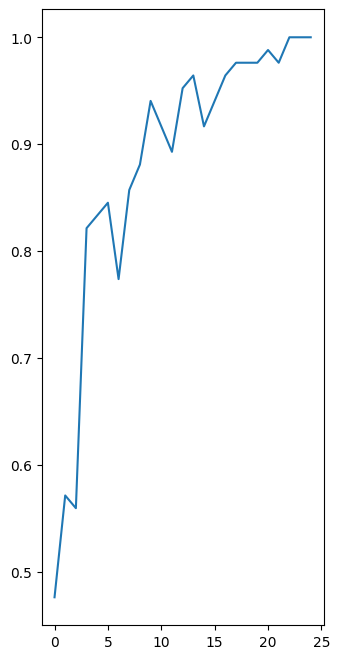

In [17]:
epoch_range = range(epoch_size)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, history.history['accuracy'], label='Training Accuracy')

In [20]:
import numpy as np

In [33]:
image = "/content/drive/MyDrive/archive/Skin_Data/Testing/Non_Cancer/1065.jpg"
image = tf.keras.utils.load_img(image, target_size=(image_width, image_height))
input_arr = tf.keras.utils.img_to_array(image)
img_bat = np.expand_dims(input_arr, axis=0)
predictions = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


In [34]:
score = tf.nn.softmax(predictions[0])
print(f"The given image is {data_category[np.argmax(score)]} with accuracy of {np.max(score)*100}")

The given image is Non_Cancer with accuracy of 94.5218505859375
